In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df_GDP_pre = pd.read_csv('../../Data/Downloaded/pre_GDP.csv')
df_GDP_post = pd.read_csv('../../Data/Downloaded/post_GDP.csv')
df_pi_pre   = pd.read_csv('../../Data/Downloaded/pre_price.csv')
df_pi_post  = pd.read_csv('../../Data/Downloaded/post_price.csv')
df_GDP_def_post = pd.read_csv('../../Data/Downloaded/post_GDP_def.csv')
df_pop = pd.read_csv('../../Data/Downloaded/post_pop.csv')

In [3]:
linked_ind_34_to_55_agg = df_pi_pre.iloc[-1]['price_ind_agg'].astype(float)

In [4]:
linked_ind_34_to_55_agg

321.6

In [5]:
# price at 1990 is set to 100
p_1990 = 100

In [6]:
GDP_def_55_to_90_tot = p_1990 / df_GDP_def_post.loc[0]['tot_prv_GDP']

In [7]:
GDP_def_55_to_90_prm = p_1990 / df_GDP_def_post.loc[0]['prm_GDP'] 

In [8]:
GDP_def_55_to_90_tot

5.208333333333334

In [9]:
GDP_def_55_to_90_prm

5.319148936170213

In [10]:
# create defilator that converts variables in 1934 to 1936 prices to 1990 prices

In [11]:
GDP_def_55_to_90_col = [GDP_def_55_to_90_prm, GDP_def_55_to_90_tot]

In [12]:
GDP_def_34_to_90_col = [x * linked_ind_34_to_55_agg for x in GDP_def_55_to_90_col]

In [13]:
GDP_def_34_to_90_col

[1710.6382978723404, 1675.0000000000002]

In [14]:
col_org = ['prm_GDP', 'tot_GDP']
col_p90 = ['prm_GDP_p90', 'tot_GDP_p90']

In [15]:
# convert unit from 1 million yen to 1 billion yen
adjust_unit = 1000

In [16]:
for ind, col_name in enumerate(col_org):
    df_GDP_pre[col_p90[ind]] = df_GDP_pre[col_name] * GDP_def_34_to_90_col[ind] / adjust_unit

In [17]:
df_GDP_pre_picked = df_GDP_pre[['year_wst', 'prm_GDP_p90', 'tot_GDP_p90']]

In [18]:
df_GDP_post_picked = df_GDP_post[['year_wst', 'prm_GDP', 'tot_prv_GDP']]

In [19]:
df_GDP_post_picked.columns = ['year_wst', 'prm_GDP_p90', 'tot_GDP_p90']

In [20]:
df_GDP_pre_picked['non_prm_GDP_p90'] = df_GDP_pre_picked['tot_GDP_p90'] - df_GDP_pre_picked['prm_GDP_p90']

<ipython-input-20-db318b54a773>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GDP_pre_picked['non_prm_GDP_p90'] = df_GDP_pre_picked['tot_GDP_p90'] - df_GDP_pre_picked['prm_GDP_p90']


In [21]:
df_GDP_post_picked['non_prm_GDP_p90'] = df_GDP_post_picked['tot_GDP_p90'] - df_GDP_post_picked['prm_GDP_p90']

<ipython-input-21-46388cc8b5e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GDP_post_picked['non_prm_GDP_p90'] = df_GDP_post_picked['tot_GDP_p90'] - df_GDP_post_picked['prm_GDP_p90']


In [22]:
df_GDP_merged = pd.concat([df_GDP_pre_picked, df_GDP_post_picked])

In [23]:
df_GDP_merged

,year_wst,prm_GDP_p90,tot_GDP_p90,non_prm_GDP_p90
0,1885,2555.693617,5984.775,3429.081383
1,1886,2790.051064,6435.350,3645.298936
2,1887,2930.323404,6830.650,3900.326596
3,1888,2834.527660,6493.975,3659.447340
4,1889,2577.931915,6855.775,4277.843085
...,...,...,...,...
39,1994,10161.900000,433472.100,423310.200000
40,1995,9652.900000,442148.200,432495.300000
41,1996,9924.100000,461929.300,452005.200000
42,1997,9523.000000,469323.200,459800.200000


In [24]:
df_GDP_pop_merged = df_GDP_merged.join(df_pop.set_index('year_wst'), on = 'year_wst')

In [25]:
df_GDP_pop_merged['prm_GDP_p90_pc'] = df_GDP_pop_merged['prm_GDP_p90'] / df_GDP_pop_merged['tot_pop']

In [26]:
df_GDP_pop_merged['tot_GDP_p90_pc'] = df_GDP_pop_merged['tot_GDP_p90'] / df_GDP_pop_merged['tot_pop']

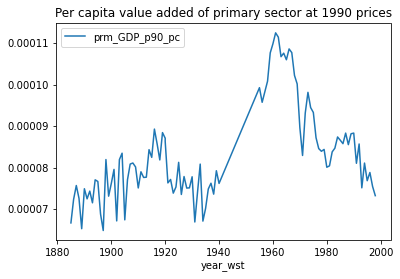

In [27]:
fig, ax = plt.subplots()
df_GDP_pop_merged.plot(x = 'year_wst', y = 'prm_GDP_p90_pc', ax = ax)
plt.title('Per capita value added of primary sector at 1990 prices')
plt.show()

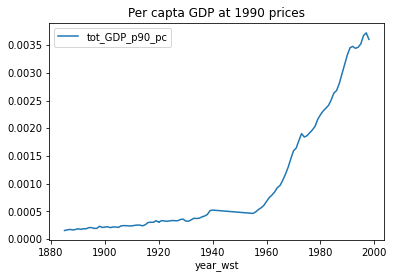

In [28]:
fig, ax = plt.subplots()
df_GDP_pop_merged.plot(x = 'year_wst', y = 'tot_GDP_p90_pc', ax = ax)
plt.title('Per capta GDP at 1990 prices')
plt.show()

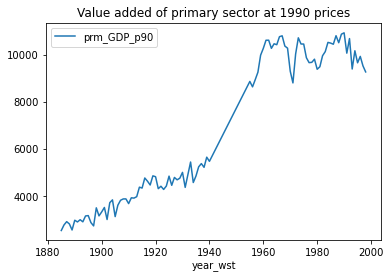

In [29]:
fig, ax = plt.subplots()
df_GDP_merged.plot(x = 'year_wst', y = 'prm_GDP_p90', ax = ax)
plt.title('Value added of primary sector at 1990 prices')
plt.show()

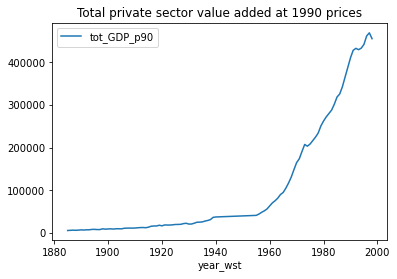

In [30]:
fig, ax = plt.subplots()
df_GDP_pop_merged.plot(x = 'year_wst', y = 'tot_GDP_p90', ax = ax)
plt.title('Total private sector value added at 1990 prices')
plt.show()

In [31]:
df_pre = df_GDP_pre_picked
df_post = df_GDP_post_picked

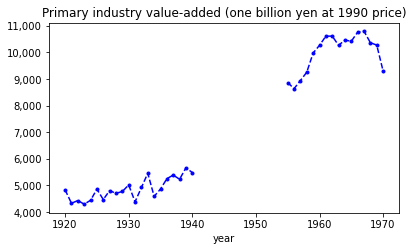

In [32]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
#df_pre.plot(x = 'year_wst', y = 'prm_cap_p90_bil', 
df_pre[df_pre.year_wst >= 1920].plot(x = 'year_wst', y = 'prm_GDP_p90', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#df_post.plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
df_post[df_post.year_wst <= 1970].plot(x = 'year_wst', y = 'prm_GDP_p90',  
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Primary industry value-added (one billion yen at 1990 price)')
plt.savefig('../../Notes/comb_prm_GDP.pdf')
plt.show()

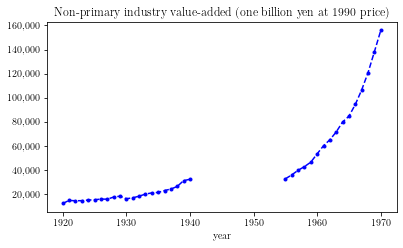

In [33]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
#df_pre.plot(x = 'year_wst', y = 'prm_cap_p90_bil', 
df_pre[df_pre.year_wst >= 1920].plot(x = 'year_wst', y = 'non_prm_GDP_p90', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#df_post.plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
df_post[df_post.year_wst <= 1970].plot(x = 'year_wst', y = 'non_prm_GDP_p90',  
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Non-primary industry value-added (one billion yen at 1990 price)')
plt.savefig('../../Notes/comb_non_prm_GDP.pdf')
plt.show()

In [34]:
df_GDP_pop_merged

,year_wst,prm_GDP_p90,tot_GDP_p90,non_prm_GDP_p90,tot_pop,prm_GDP_p90_pc,tot_GDP_p90_pc
0,1885,2555.693617,5984.775,3429.081383,38313000,0.000067,0.000156
1,1886,2790.051064,6435.350,3645.298936,38541000,0.000072,0.000167
2,1887,2930.323404,6830.650,3900.326596,38703000,0.000076,0.000176
3,1888,2834.527660,6493.975,3659.447340,39029000,0.000073,0.000166
4,1889,2577.931915,6855.775,4277.843085,39473000,0.000065,0.000174
...,...,...,...,...,...,...,...
39,1994,10161.900000,433472.100,423310.200000,125265000,0.000081,0.003460
40,1995,9652.900000,442148.200,432495.300000,125570000,0.000077,0.003521
41,1996,9924.100000,461929.300,452005.200000,125859000,0.000079,0.003670
42,1997,9523.000000,469323.200,459800.200000,126157000,0.000075,0.003720
